In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.initializers import HeUniform, GlorotUniform
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras import datasets

In [2]:
import pathlib
data_dir = pathlib.Path(r"/kaggle/input/brain-tumor-mri-dataset/")

train_dir = '/kaggle/input/brain-tumor-mri-dataset/Training'
test_dir = '/kaggle/input/brain-tumor-mri-dataset/Testing'

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir = str(data_dir / "Training")
test_dir = str(data_dir / "Testing")

In [5]:
batch_size = 32
img_height = 240
img_width = 240

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_height , img_width),
    batch_size = batch_size,
    class_mode = "categorical"
    )


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_height,img_width),
    batch_size =batch_size,
    class_mode ="categorical"
    )

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


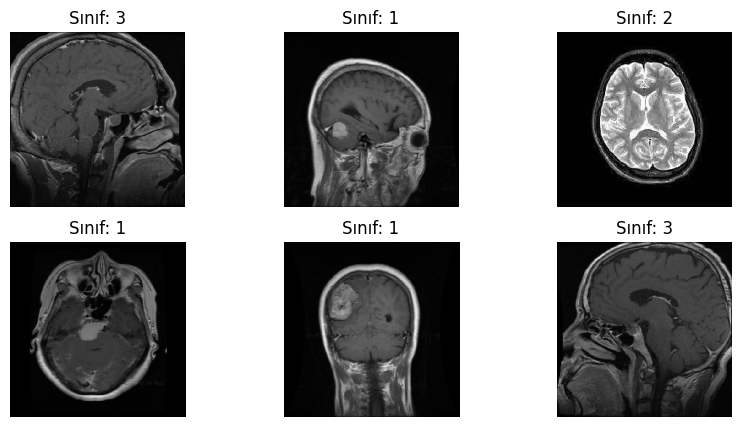

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_batch, y_batch = next(train_generator)

plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_batch[i])
    plt.title(f"Sınıf: {np.argmax(y_batch[i])}")
    plt.axis("off")
plt.show()

# VGG MODEL

In [8]:
from tensorflow.keras.applications import VGG16
vgg16_base = VGG16(weights="imagenet" , include_top=False , input_shape=(img_height,img_width,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
for layer in vgg16_base.layers:
    layer.trainable =False

In [ ]:
x = Flatten()(vgg16_base.output)
x = Dense(64 , activation="relu" , kernel_initializer=HeUniform())(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128 , activation="relu" , kernel_initializer=HeUniform())(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(256 , activation="relu" , kernel_initializer=HeUniform())(x)

x = Dense(4, activation="softmax")(x)

In [11]:
model = Model(inputs= vgg16_base.input , outputs=x)

In [12]:
model.compile(optimizer=Adam(learning_rate=0.001) , loss = "categorical_crossentropy" , metrics=["accuracy"])

In [13]:
model.fit(train_generator, validation_data=train_generator, epochs=15)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 96s 426ms/step - accuracy: 0.7230 - loss: 0.7606 - val_accuracy: 0.9147 - val_loss: 0.2274
Epoch 2/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 55s 306ms/step - accuracy: 0.8883 - loss: 0.3025 - val_accuracy: 0.9412 - val_loss: 0.1513
Epoch 3/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 58s 318ms/step - accuracy: 0.9200 - loss: 0.2099 - val_accuracy: 0.9744 - val_loss: 0.0681
Epoch 4/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 57s 317ms/step - accuracy: 0.9516 - loss: 0.1390 - val_accuracy: 0.9685 - val_loss: 0.0799
Epoch 5/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 57s 316ms/step - accuracy: 0.9532 - loss: 0.1295 - val_accuracy: 0.9720 - val_loss: 0.0681
Epoch 6/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 58s 319ms/step - accuracy: 0.9578 - loss: 0.1292 - val_accuracy: 0.9494 - val_loss: 0.1196
Epoch 7/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 57s 317ms/step - accuracy: 0.9679 - loss: 0.0881 - val_accuracy: 0.9744 - val_loss: 0.0659
Epoch 8/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 57s 317ms/step - accuracy: 0.9705 - loss: 0.0799 - val

In [ ]:
x_test, y_test = next(test_generator)

predictions = model.predict(x_test)


predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

print("Accuracy:", accuracy_score(true_classes, predicted_classes))
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))
print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
Accuracy: 0.90625
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.67      1.00      0.80         6
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         8

    accuracy                           0.91        32
   macro avg       0.92      0.89      0.88        32
weighted avg       0.94      0.91      0.90        32

Confusion Matrix:
[[ 4  3  0  0]
 [ 0  6  0  0]
 [ 0  0 11  0]
 [ 0  0  0  8]]


In [16]:
model.save("/kaggle/working/Tumor_classification_vgg16.h5")

In [17]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 19,660,430 (75.00 MB)

 Trainable params: 1,648,452 (6.29 MB)

 Non-trainable params: 14,715,072 (56.13 MB)

 Optimizer params: 3,296,906 (12.58 MB)

# Predict

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

def predict_image_class(img_path, model, class_indices, img_size=(240, 240)):
    # Load và xử lý ảnh
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Chuẩn hóa như lúc train
    img_array = np.expand_dims(img_array, axis=0)  # Thêm batch dimension

    # load model predict
    model = load_model('/kaggle/working/Tumor_classification_vgg16.h5')

    # Dự đoán
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class_idx]

    # Lấy tên lớp từ class_indices
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_class_label = class_labels[predicted_class_idx]

    # In kết quả
    print(f"Ảnh này được dự đoán thuộc lớp: '{predicted_class_label}'")
    print(f"Độ tự tin: {confidence * 100:.2f}%")

    # Hiển thị ảnh (tuỳ chọn)
    plt.imshow(img)
    plt.title(f"{predicted_class_label} ({confidence * 100:.2f}%)")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
Ảnh này được dự đoán thuộc lớp: 'glioma'
Độ tự tin: 99.84%


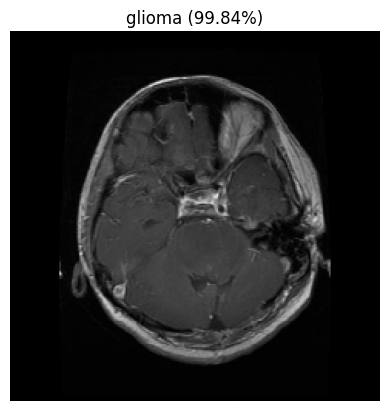

In [25]:
predict_image_class("/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0010.jpg", model, train_generator.class_indices)
